In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [19]:
X = load_boston().data
Y = load_boston().target
Y = Y.reshape(-1, 1)

In [20]:
x_scaler = preprocessing.StandardScaler().fit(X)
X = x_scaler.transform(X)
y_scaler = preprocessing.StandardScaler().fit(Y)
Y = y_scaler.transform(Y)

In [23]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = [] 
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X=X,y_true=Y.reshape(Y.shape[0],),epochs=500)
w, b, cost

(array([-0.0579757 ,  0.05279338,  0.03309954,  0.07746322, -0.05505529,
         0.37687079, -0.00615325, -0.13388913,  0.14816939, -0.16194334,
        -0.18893937,  0.10825452, -0.36715917]),
 1.327774078652104e-15,
 0.27697260155426173)

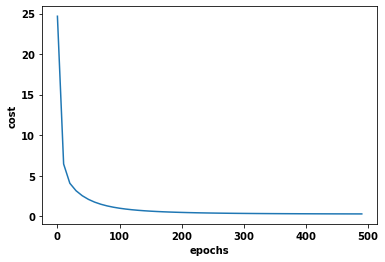

In [24]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [29]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = [] 
    for i in range(epochs):
        random_index = random.randint(0,total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
         
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X=X,y_true=Y.reshape(Y.shape[0],),epochs=10000)
w_sgd, b_sgd, cost_sgd

(array([0.38259831, 1.00356529, 0.43432845, 0.72537572, 0.48312463,
        1.1479476 , 0.52860989, 1.2261355 , 0.28381257, 0.24605242,
        0.51049888, 1.08248264, 0.4259463 ]),
 0.0020641888698608815,
 11.077451713999302)

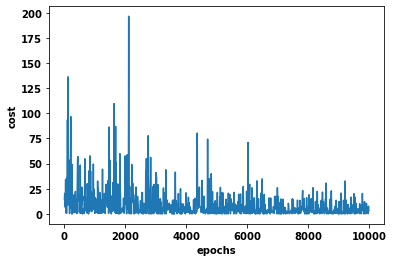

In [30]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [33]:
import random
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = [] 
    for i in range(epochs):
        for j in range(0,total_samples - 1,20):
            sample_x = X[j:j+20]
            sample_y = y_true[j:j+20]
        
            y_predicted = np.dot(w, sample_x.T) + b
         
            w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
            b_grad = -(2/total_samples)*np.sum(sample_y - y_predicted)
        
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
        
            cost = np.mean(np.square(sample_y - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(X=X,y_true=Y.reshape(Y.shape[0],),epochs=1000)
w_mbgd, b_mbgd, cost_mbgd

(array([-0.09138345,  0.100679  ,  0.00126668,  0.07694283, -0.18864616,
         0.30363139, -0.00351503, -0.30516173,  0.23250223, -0.17637274,
        -0.21749926,  0.09479131, -0.40409675]),
 -0.0008610691162126475,
 0.3189817770337268)

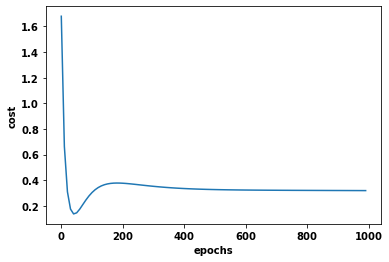

In [34]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_mbgd,cost_list_mbgd)